In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])
import scipy as sc
import sympy as smp

  # Introduction

The purpose of Monte Carlo is to simulate a real life experiment that depends on randomness to some extent.

* Counting number of radioactive decays from some radioactive source in a time interval $\Delta t$. The random variable here number of counts N (positive integer) and follows a $\textbf{Poisson probability mass function}$.


$$ f(x)\ =\ \frac{e^{-\lambda}\lambda^x}{x!} $$

* Determining the energy of detected particles in a detector cell in the ATLAS calorimeter in a time interval $\Delta t$. The random variable here is energy E (positive real number) and the corresponding probability density function is.

$$ f(x)\ =\ F_{1}e^{-\sqrt{x/E_{1}}}\ + F_{2}e^{-\sqrt{x/E_{2}}} $$

* Determining the distance a particle travels through matter before it completely decays. The random variable here is distance X and a really simple probability density function model might be

$$ f(x)\ =\ \frac{x_{0}}{x^2} \ \ \ \ \, x\ \geq x_{0}$$

* $\textbf{Estimating a value for π}$

For most cases this boils down into two steps

$\textbf{1:\ Generate Random Variables According to a Distribution}$

$ \textbf{2: Use These Random Variables to Conduct Some Experiment}$

# 1: Generate Random Variables According to the Normal Distribution :

## 1.1 Inverting the CDF Analytically

$\textbf{Theorem}$ : If a random variable X has a CDF of F(x) then the variable F-1(U), where U is a random uniform variable between 0 and 1, also has CDF F(x)

$$ X\ \sim\ F(x) \Rightarrow\ F^{-1}(U) \sim\ F(x) $$

$\textbf{Example}$ : The expotential distribution is

$$ f(x)\ =\ \lambda e^{-\lambda x} \Rightarrow\ F(x)\ =\ 1\ -\ e^{-\lambda x}$$

In [58]:
x = np.linspace(0,3,100)
f = 2*np.exp(-2*x)
F = 1 - np.exp(-2*x)

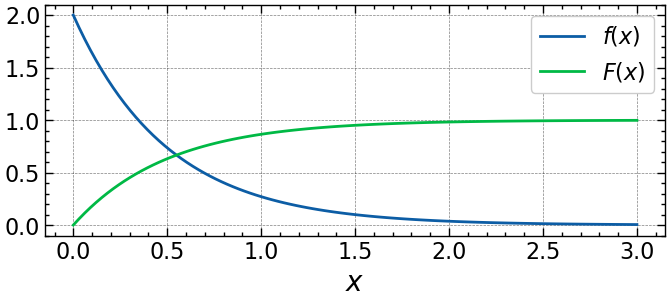

In [64]:
plt.figure(figsize=(8,3))
plt.plot(x, f, label=r'$f(x)$')
plt.plot(x, F, label=r'$F(x)$')
plt.legend()
plt.xlabel('$x$', fontsize=20)
plt.legend()
plt.show()

Using $F[F^{-1}(x)]$ = x, we get 

$$ 1\ -\ e^{-\lambda F^{-1}(x)}\ =\ x\ \Rightarrow\ F^{-1}(x)\ =\ -\frac{ln(1-x)}{\lambda} $$

so, if we evaluate a bunch of random uniform variable U and evaluate $F^{-1}(U)$, they should be distributed according to f(x) above

In [81]:
U = np.random.rand(10000)
U

array([0.40433226, 0.70963892, 0.58521979, ..., 0.97477244, 0.82873839,
       0.33272165])

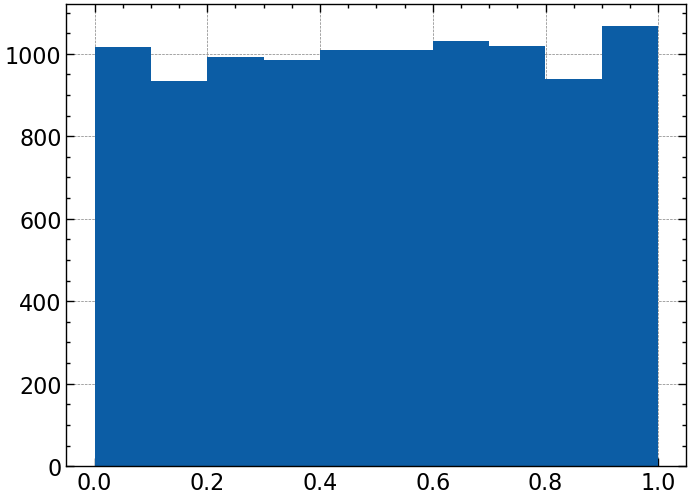

In [83]:
plt.hist(U)
plt.show()

In [131]:
U = np.random.rand(10000)
F_inv_U = -np.log(1-U)/2

Lets plot these and see if they really are destributed according to f(x)

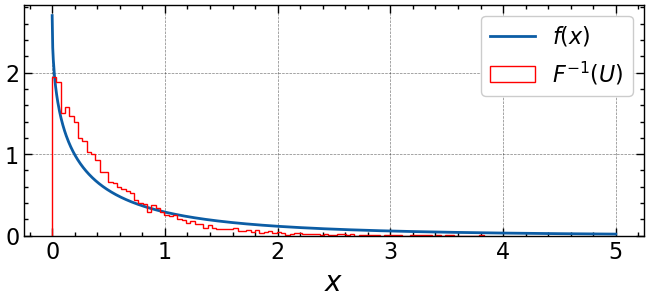

In [133]:
plt.figure(figsize=(8,3))
plt.plot(x, f, label=r'$f(x)$')
plt.hist(F_inv_U, histtype='step', color='red', density='norm', bins=100, label='$F^{-1}(U)$')
plt.legend()
plt.xlabel('$x$', fontsize=20)
plt.show()

### 1.2 Using a Search Sort Algorithm

Sometimes F(x) is not invertible analytically. but

* F(x) is always increasing with x

So it is necessary invertible (there just might not be a formula for it).

$$ f(x)\ =\ F_{1}e^{-\sqrt{x/E_{1}}}\ + F_{2}e^{-\sqrt{x/E_{2}}} $$

In [135]:
x, y, E1, E2, F1, F2 = smp.symbols('x y E_1 E_2 F_1 F_2', real=True, positive=True)
fs = F1*smp.exp(-smp.sqrt(x/E1)) + F2*smp.exp(-smp.sqrt(x/E2)).simplify()
fs

F_1*exp(-sqrt(x)/sqrt(E_1)) + F_2*exp(-sqrt(x)/sqrt(E_2))

In [137]:
Fs = smp.integrate(fs, (x,0,y)).simplify()
Fs

-2*sqrt(E_1)*F_1*sqrt(y)*exp(-sqrt(y)/sqrt(E_1)) + 2*E_1*F_1 - 2*E_1*F_1*exp(-sqrt(y)/sqrt(E_1)) - 2*sqrt(E_2)*F_2*sqrt(y)*exp(-sqrt(y)/sqrt(E_2)) + 2*E_2*F_2 - 2*E_2*F_2*exp(-sqrt(y)/sqrt(E_2))

In [139]:
Fn = smp.lambdify((y, E1, E2, F1, F2), Fs)
fn = smp.lambdify((x, E1, E2, F1, F2), fs)

Get parameters and actual numerical values

In [142]:
E1 = E2 = 0.2
F1 = 1.3
F2 = 1.4

In [144]:
x = np.linspace(0,5,1000)
f = fn(x, E1, E2, F1, F2)
F = Fn(x, E1, E2, F1, F2)

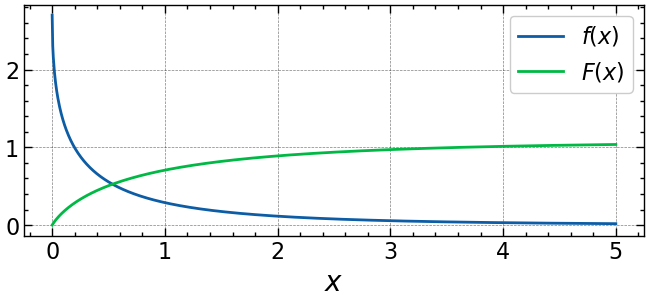

In [146]:
plt.figure(figsize=(8,3))
plt.plot(x, f, label=r'$f(x)$')
plt.plot(x, F, label=r'$F(x)$')
plt.legend()
plt.xlabel('$x$', fontsize=20)
plt.show()

Clearly, F(x) is always increasing but inverting that formula would be a real pain, How can we approximate $F^{-1}(x)$ given the information we have?

In [148]:
F_inv_U = x[np.searchsorted(F[:-1], U)]

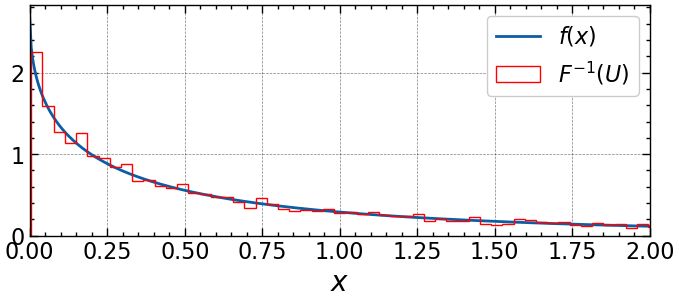

In [154]:
plt.figure(figsize=(8,3))
plt.plot(x, f, label=r'$f(x)$')
plt.hist(F_inv_U, histtype='step', color='red', density='norm', bins=100, label='$F^{-1}(U)$')
plt.legend()
plt.xlabel('$x$', fontsize=20)
plt.xlim(0,2)
plt.show()

## 1.3 Built In Random Variables

In [158]:
r = np.random.rayleigh(size=1000)

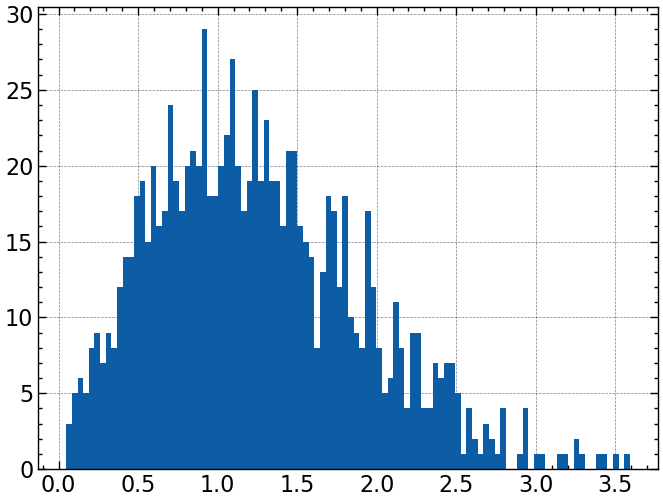

In [160]:
plt.hist(r, bins=100)
plt.show()

In [162]:
np.random?

Type:        module
String form: <module 'numpy.random' from 'C:\\Users\\saura\\anaconda3\\Lib\\site-packages\\numpy\\random\\__init__.py'>
File:        c:\users\saura\anaconda3\lib\site-packages\numpy\random\__init__.py
Docstring:  
Random Number Generation

Use ``default_rng()`` to create a `Generator` and call its methods.

=============== =========================================================
Generator
--------------- ---------------------------------------------------------
Generator       Class implementing all of the random number distributions
default_rng     Default constructor for ``Generator``
=============== =========================================================

============================================= ===
BitGenerator Streams that work with Generator
--------------------------------------------- ---
MT19937
PCG64
PCG64DXSM
Philox
SFC64
============================================= ===

============================================= ===
Getting entropy to initial

# 2 : Use of These Random Variables to Conduct an Experiment

* The amount of particles that enter a detector in 10s in a random variable X with distribution

$$ f(x)\ =\ \frac{e^{-\lambda}\lambda^x}{x!} $$

* The energy deposited by each particle is a random variable E with distribution 

$$ g(x)\ =\ F_{1}e^{-\sqrt{x/E_{1}}}\ + F_{2}e^{-\sqrt{x/E_{2}}} $$

The parameters are

* $\ \lambda\ =\ 4$
* $\ F_{1}\ = \ 1.3\ GeV^{-1}$
* $\ F_{2}\ =\ 1.4\ GeV^{-1}$
* $ \ E_{1}\ = 0.1\ GeV^{-1} $
* $ \ E_{2}\ = 0.2\ GeV^{-1} $

Lets Simulate the energy in the detector over 10000 experiments of 10 seconds each. plot the distribution

In [212]:
N = 100000

# part 1
X = np.random.poisson(lam=4, size=N)

# part 2
x = np.linspace(0,5,1000)
F = Fn(x, E1, E2, F1, F2)
U = np.random.rand(X.sum())
E = x[np.searchsorted(F[:-1], U)]

Get a net sum of how many particles were detected total after n experiments:

In [215]:
idx = np.insert(X.cumsum(), 0, 0)[:-1]
idx[0:10]

array([ 0,  2,  5, 10, 12, 14, 17, 19, 27, 30])

In [217]:
E[0:10]

array([1.30630631, 1.46646647, 1.65165165, 1.15615616, 0.11011011,
       1.45645646, 3.25825826, 1.08608609, 0.43543544, 1.17117117])

In [219]:
E_10s = np.add.reduceat(E, idx)

In [221]:
E_10s

array([2.77277277, 2.91791792, 7.40740741, ..., 4.84984985, 3.6036036 ,
       0.22522523])

 Plot

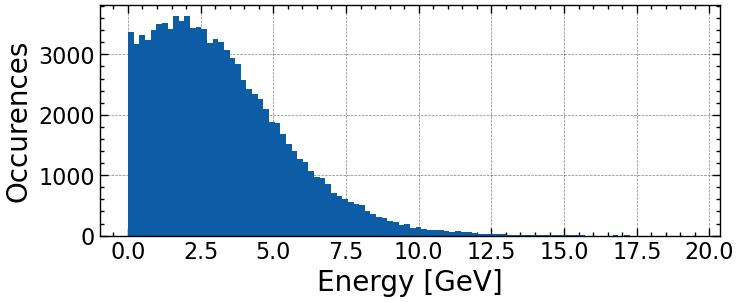

In [230]:
plt.figure(figsize=(8,3))
plt.hist(E_10s, bins=100)
plt.xlabel('Energy [GeV]', fontsize=20)
plt.ylabel('Occurences', fontsize=20)
plt.show()

In [234]:
np.sum(E_10s > 7.5)/len(E_10s)

0.05242

So, 5% of the time we except more than 7.5 GeV of Energy to be deposited in the detector within 10s. This might be useful when planning for resources, such as requirements for detecting the new particle